# Compare Results for Human Psychophysics and Machine


In [123]:
import pickle
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import detectron2.structures.boxes as boxes
import torch
from scipy.stats import linregress
# #load dicts
# pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/human_psychophysics_slopes.pickle'
# with open(pkl_file, 'rb') as f:
#     accuracies_human = pickle.load(f)

# #detrex model
# pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/machine_psychophysics_slopes_sdt_detrex.pickle'
# with open(pkl_file, 'rb') as f:
#     accuracies_machine_detrex = pickle.load(f)

# #full rcnn model(all eccs)
# pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/machine_psychophysics_slopes_sdt.pickle'
# with open(pkl_file, 'rb') as f:
#     accuracies_machine_rcnn = pickle.load(f)

imtype = 'original' #foveated
print(imtype)
bad_ims = []

if imtype == "original":
    bad_ims = ['000000009769.jpg','000000067616.jpg','000000019042.jpg','000000209530.jpg','000000018380.jpg']
elif imtype == "foveated":
    bad_ims = ['000000009769.jpg','000000067616.jpg','000000019042.jpg','000000018150.jpg','000000119445.jpg']
elif imtype == "pseudo":
    bad_ims = ['000000009769.jpg','000000067616.jpg','000000019042.jpg','000000011197.jpg']
#human data
#pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/human_psychophysics_curves.pickle'
#added vd 11/17/23 by subject for error bars
pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/human_psychophysics_curves_bysub.pickle'
with open(pkl_file, 'rb') as f:
    accuracies_human = pickle.load(f)
#added vd 11/23/23 control experiment
# naive = True
# if naive:
pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/human_psychophysics_curves_bysub_ICLR_rebuttal_naive.pickle'
with open(pkl_file, 'rb') as f:
    accuracies_human_control_naive = pickle.load(f)
    
pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/human_psychophysics_curves_bysub_ICLR_rebuttal_all_subjs.pickle'
with open(pkl_file, 'rb') as f:
    accuracies_human_control_all = pickle.load(f)

#models
#pkl_file = '/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/no_threshold_results/machine_psychophysics_accuracies_full_sdt_catmatch_False.pickle'
pkl_file = f'/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/machine_psychophysics_curves_Clean_{imtype}.pickle'
pkl_file = f'/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/machine_psychophysics_curves_Clean_{imtype}_fovea.pickle'
pkl_file = f'/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/machine_psychophysics_curves_Clean_{imtype}_maxprob.pickle'

with open(pkl_file, 'rb') as f:
    accuracies_machine = pickle.load(f)

    
    

original


In [25]:
# pkl_file = f'/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/yes_threshold_dino_focalnet_results/machine_psychophysics_accuracies_full_sdt_detrex_dino_focalnet_nocatmatch.pickle'
# with open(pkl_file, 'rb') as f:
#     accuracies_detrex_focalnet = pickle.load(f)
    
# pkl_file = f'/home/gridsan/groups/RosenholtzLab/detection_repos/CocoPDetection/yes_threshold_dino_tiny_results/machine_psychophysics_accuracies_full_sdt_detrex_dino_tiny_nocatmatch.pickle'
# with open(pkl_file, 'rb') as f:
#     accuracies_detrex_tiny = pickle.load(f)

# accuracies_machine['-1DF'] = accuracies_detrex_focalnet['-1']
# accuracies_machine['-1DT'] = accuracies_detrex_tiny['-1']
    

In [26]:
accuracies_machine.keys()

dict_keys(['-1DT', '-1DF', 'RN', 'DT50', 'X101', 'BL_RCNN_no_thresh', 'TR_RCNN_no_thresh', 'FT_RCNN_no_thresh', '-1', '-2', '100', 'FoveaBox', 'BL_RCNN_maxprob', 'FT_RCNN_maxprob', 'TR_RCNN_maxprob'])

In [124]:
eccs = [0,5,10,15,20]
eccs_to_px = {0: 0,
              5: 80,
              10: 160,
              15: 240,
              20: 320}
px_to_eccs = {0: 0,
              80:5,
              160:10,
              240:15,
              320:20}
model_plotname = {
                  '-1DT': 'DINO Swin Tiny',
                  '-1DF': 'DINO FocalNet',
                  'RN': 'RETINA R50',
                  'DT50': 'DETR R50',
                  'X101': 'FrRCNN X101',
                'BL_RCNN_no_thresh': "FrRCNN R50 ",
                'TR_RCNN_no_thresh': "All$^\circ$TR FrRCNN ",
                'FT_RCNN_no_thresh':"All$^\circ$FT FrRCNN ",
                  '-1': 'FrRCNN R50',
                  '-2': 'All$^\circ$TR FrRCNN',
                  '100': 'All$^\circ$FT FrRCNN',
                    'FoveaBox':'FoveaBox'
                    }
# models_to_plot = ['-1DT','-1DF','RN','DT50','X101', -1,-2,5,10,15,20,100,101]
# models_to_plot = ['-1DT','-1DF','RN','DT50','X101','RCNN_low', -1,-2,100]
#models_to_plot = ['-1DT','-1DF','RN','DT50','X101', '-1','-2','100']
# models_to_plot = [-1,-2,5,10,15,20,100,101]
#model_plot_names = ['BL_Dino_Tiny','BL_DINO_FN','BL_RCNN','TR_RCNN','FT0_RCNN','FT5_RCNN','FTA_RCNN']
models_to_plot = ['-1DT','-1DF','RN','DT50','X101', '-1','-2','100','FoveaBox']

## Plot Human and Machine Slope Matches

In [125]:
#color axes
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

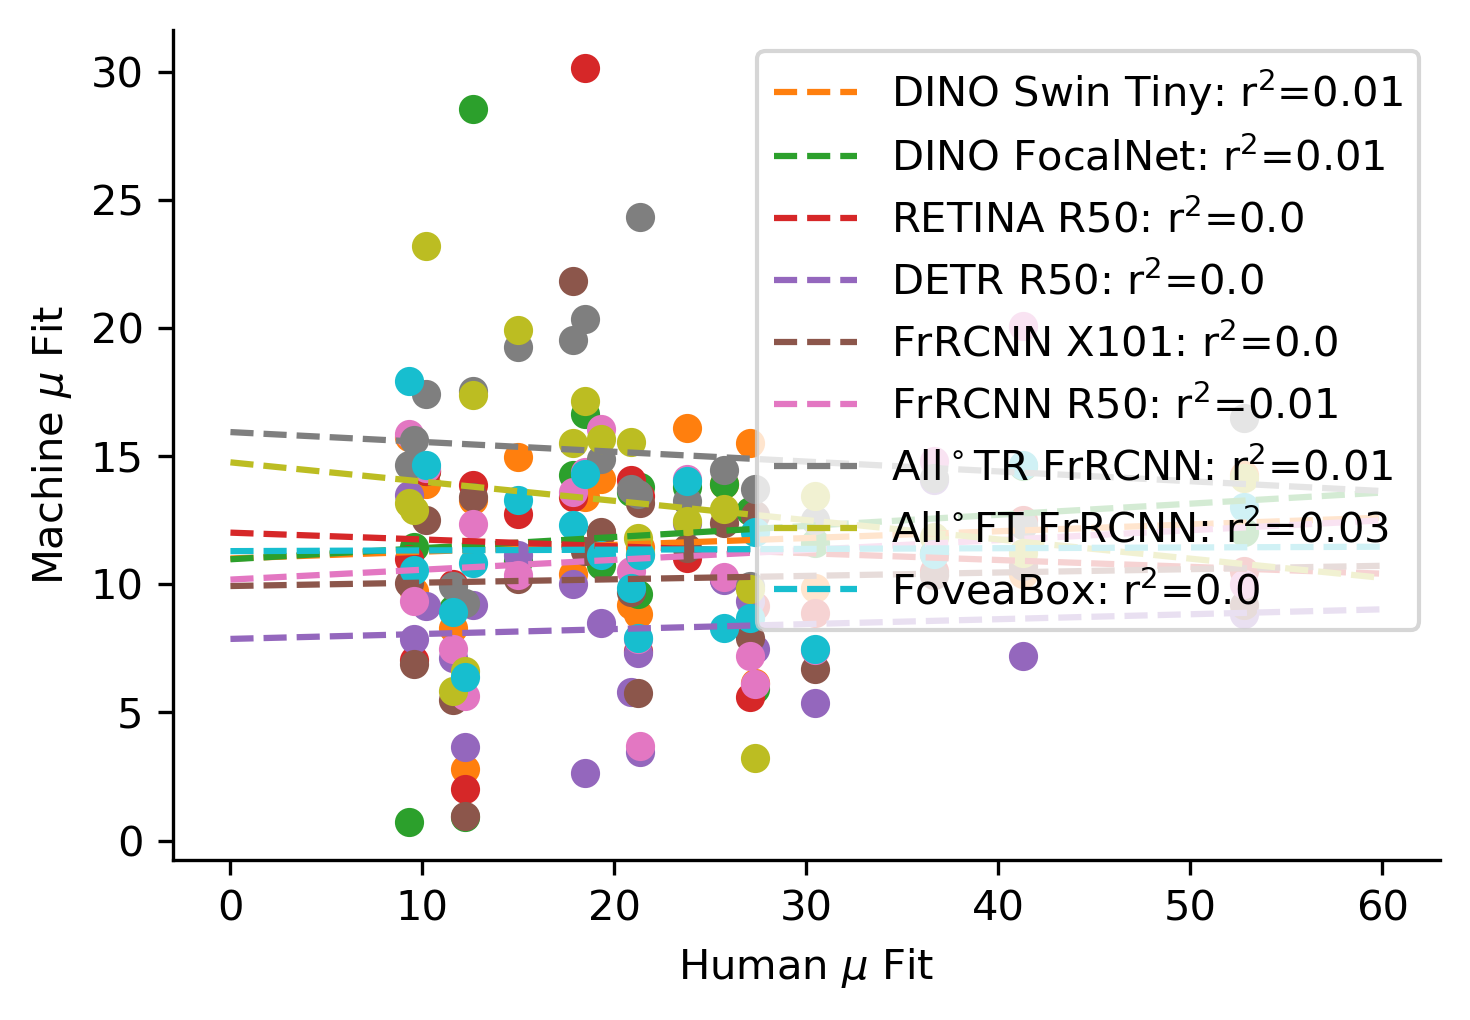

In [109]:
models_plot = models_to_plot
#models_plot = ['-1','100']
# models_plot = ['-1DT','-1DF','RN','DT50','X101',-1,-2,5,10,15,20,100,101]
#models_plot = ['-1DT','-1DF','-1','-2','5','10','15','20','100','101']
# models_plot = ['-1','-2','5','10','15','20','100','101']


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(5,3.5))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)
#RCNN
#loop through models
for i, model in enumerate(models_plot,1): #accuracies_machine.keys()
    model = str(model)
    human_fit_mus = []
    machine_fit_mus = []
    #loop through images
    for j, im in enumerate(accuracies_machine[model].keys()):
        #if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg']:
        if im not in bad_ims:
            #for ecc in accuracies_machine[model][im].keys():
            machine_mu = accuracies_machine[model][im]['mufit']
            #machine_slope = accuracies_machine_rcnn[model][im]['slope']
            #machine_slope = accuracies_machine_detrex[model][im]['slope']
            human_mu = accuracies_human[im]['mufit']
            if machine_mu >0.0 and machine_mu <100.0:
                human_fit_mus.append(human_mu)
                machine_fit_mus.append(machine_mu)
   
                if j==0:
                    ax.scatter(human_mu, machine_mu,color=colors[i%10])#,label=f'{model_plotname[model]}')
                else:
                    ax.scatter(human_mu, machine_mu,color=colors[i%10])
                
    #fit a line to this data
    regression = linregress(human_fit_mus, machine_fit_mus)
    slope = regression.slope
    intercept = regression.intercept
    rval = regression.rvalue
    pval = regression.pvalue
    stderr = regression.stderr
    #print(human_fit_mus)
    #print(machine_fit_mus)
    #print(model,slope,intercept)
    #plot line fit
    # axes = plt.gca()
    #x_vals = np.array(axes.get_xlim())
    x_vals = np.linspace(0,60,100)
    y_vals = intercept + slope * x_vals
    #plt.plot(x_vals, y_vals, '--', c=colors[i],label=f'Model ({model_plotname[model]}) Fit: m={round(slope,3)},b={round(intercept,2)}')
    ax.plot(x_vals, y_vals, '--', c=colors[i%10],label=f'{model_plotname[model]}: r$^2$={round(rval**2,2)}')

#plt.xlim(0,60)
#plt.ylim(0,60)
#ax = plt.gca()
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.legend()
plt.xlabel('Human $\mu$ Fit')
plt.ylabel('Machine $\mu$ Fit')
# plt.title("Human and Machine Critical Eccentricity")
plt.tight_layout()
#vd 11/17/23 remove save
# plt.savefig(f"./psychophysics_figs_ICLR/critical_ecc_scatter_yes_threshold_no_sd_{imtype}_rebuttal.png",dpi=300)

plt.show()

mpl.rcParams['figure.dpi'] = 100



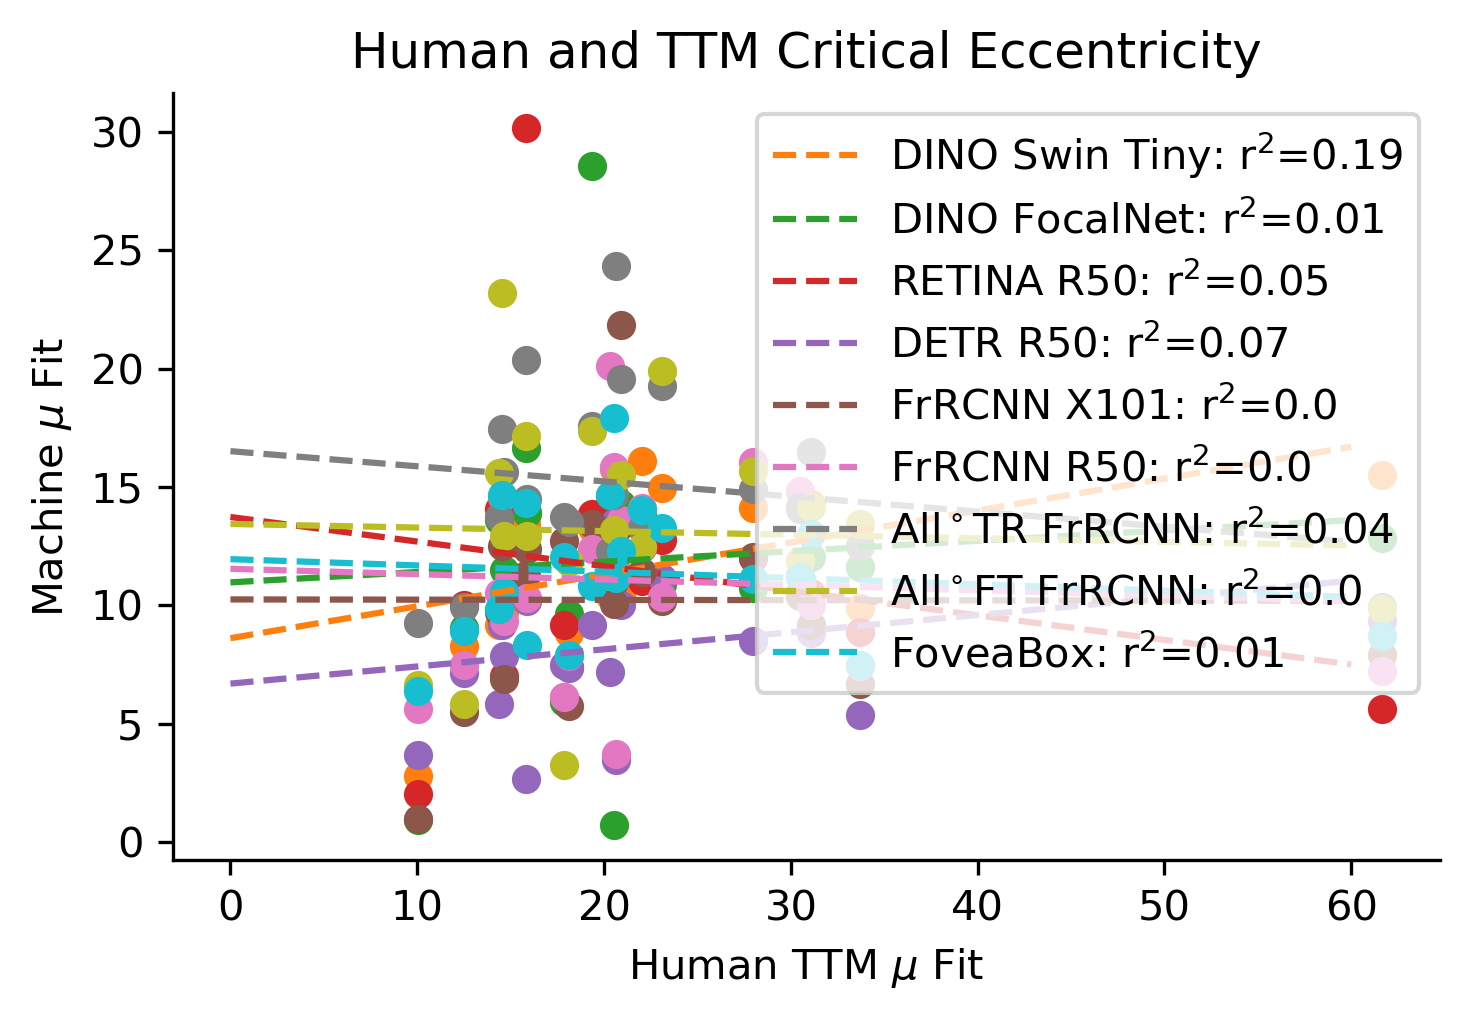

In [110]:
models_plot = models_to_plot
#models_plot = ['-1','100']
# models_plot = ['-1DT','-1DF','RN','DT50','X101',-1,-2,5,10,15,20,100,101]
#models_plot = ['-1DT','-1DF','-1','-2','5','10','15','20','100','101']
# models_plot = ['-1','-2','5','10','15','20','100','101']


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(5,3.5))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)
#RCNN
#loop through models
for i, model in enumerate(models_plot,1): #accuracies_machine.keys()
    model = str(model)
    human_fit_mus = []
    machine_fit_mus = []
    #loop through images
    for j, im in enumerate(accuracies_machine[model].keys()):
        #if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg']:
        if im not in bad_ims:
            #for ecc in accuracies_machine[model][im].keys():
            machine_mu = accuracies_machine[model][im]['mufit']
            #machine_slope = accuracies_machine_rcnn[model][im]['slope']
            #machine_slope = accuracies_machine_detrex[model][im]['slope']
            human_mu = accuracies_human_control[int(im.split('.')[0])]['mufit']
            if machine_mu >0.0 and machine_mu <100.0:
                human_fit_mus.append(human_mu)
                machine_fit_mus.append(machine_mu)
   
                if j==0:
                    ax.scatter(human_mu, machine_mu,color=colors[i%10])#,label=f'{model_plotname[model]}')
                else:
                    ax.scatter(human_mu, machine_mu,color=colors[i%10])
                
    #fit a line to this data
    regression = linregress(human_fit_mus, machine_fit_mus)
    slope = regression.slope
    intercept = regression.intercept
    rval = regression.rvalue
    pval = regression.pvalue
    stderr = regression.stderr
    #print(human_fit_mus)
    #print(machine_fit_mus)
    #print(model,slope,intercept)
    #plot line fit
    # axes = plt.gca()
    #x_vals = np.array(axes.get_xlim())
    x_vals = np.linspace(0,60,100)
    y_vals = intercept + slope * x_vals
    #plt.plot(x_vals, y_vals, '--', c=colors[i],label=f'Model ({model_plotname[model]}) Fit: m={round(slope,3)},b={round(intercept,2)}')
    ax.plot(x_vals, y_vals, '--', c=colors[i%10],label=f'{model_plotname[model]}: r$^2$={round(rval**2,2)}')

#plt.xlim(0,60)
#plt.ylim(0,60)
#ax = plt.gca()
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.legend()
plt.xlabel('Human TTM $\mu$ Fit')
plt.ylabel('Machine $\mu$ Fit')
plt.title("Human and TTM Critical Eccentricity")
plt.tight_layout()
#vd 11/17/23 remove save
# plt.savefig(f"./psychophysics_figs_ICLR/critical_ecc_scatter_yes_threshold_no_sd_{imtype}_rebuttal.png",dpi=300)

plt.show()

mpl.rcParams['figure.dpi'] = 100



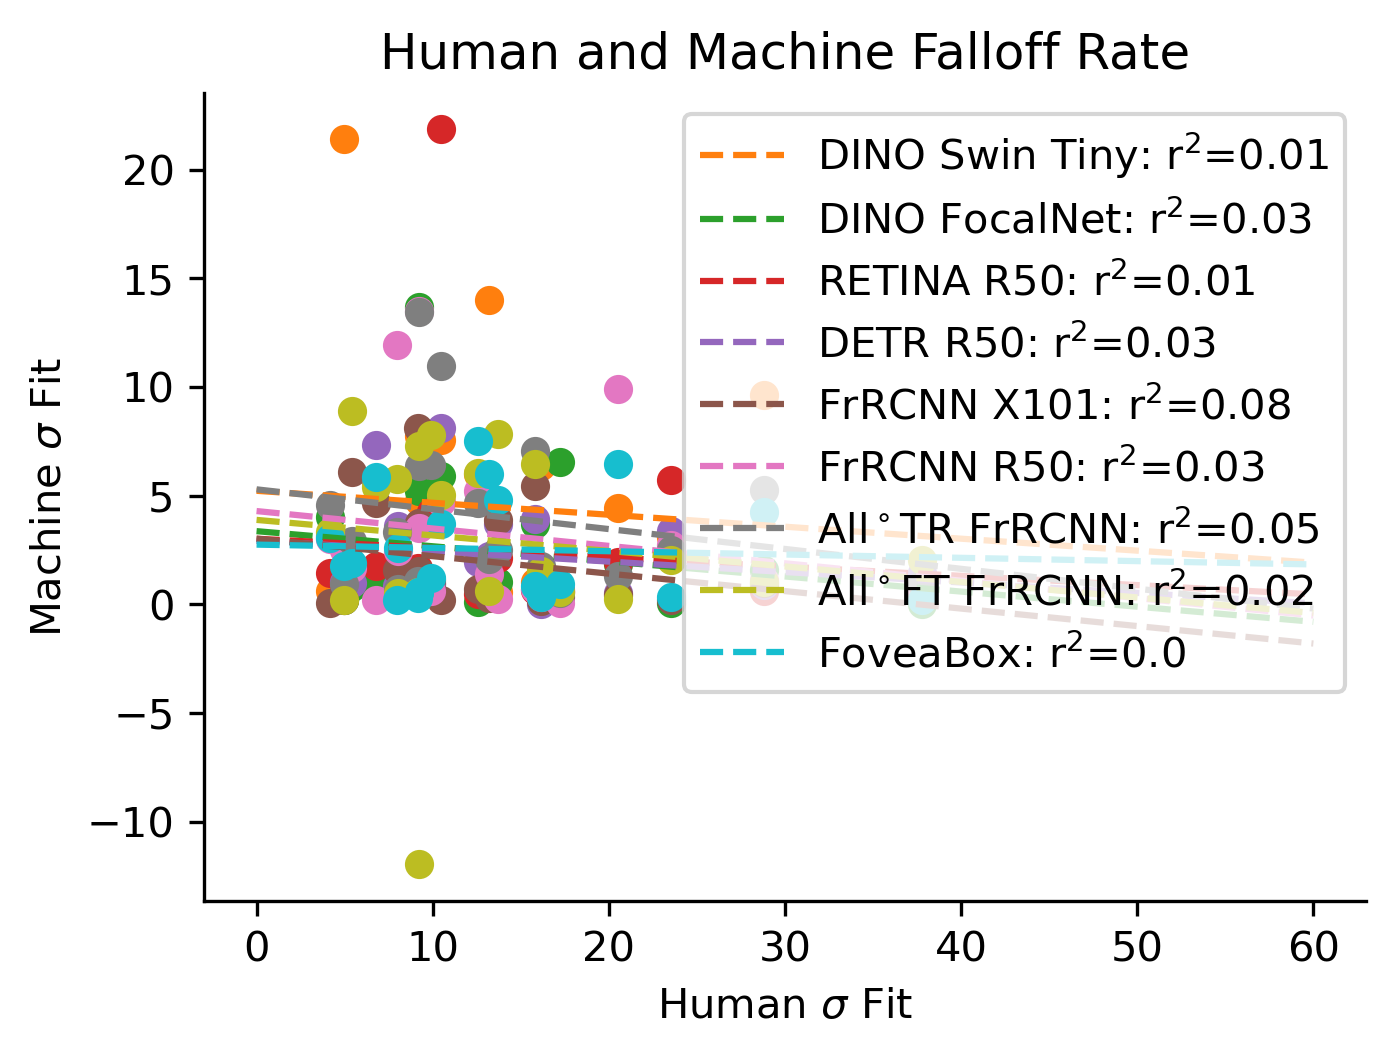

In [112]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(5,3.5))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)

#RCNN
for i, model in enumerate(models_plot,1): #accuracies_machine.keys()
    model = str(model)
    human_fit_mus = []
    machine_fit_mus = []
    for j, im in enumerate(accuracies_machine[model].keys()):
        #for ecc in accuracies_machine[model][im].keys():
        machine_mu = accuracies_machine[model][im]['sigfit']
        #machine_slope = accuracies_machine_rcnn[model][im]['slope']
        #machine_slope = accuracies_machine_detrex[model][im]['slope']
        human_mu = accuracies_human[im]['sigfit']
        
        #if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg']:
        if im not in bad_ims:
            human_fit_mus.append(human_mu)
            machine_fit_mus.append(machine_mu)
            if j==0:
                ax.scatter(human_mu, machine_mu,color=colors[i%10])#,label=f'{model_plotname[model]}')
            else:
                ax.scatter(human_mu, machine_mu,color=colors[i%10])

        #fit a line to this data
    regression = linregress(human_fit_mus, machine_fit_mus)
    slope = regression.slope
    intercept = regression.intercept
    rval = regression.rvalue
    pval = regression.pvalue
    stderr = regression.stderr
    #print(human_fit_mus)
    #print(machine_fit_mus)
    #print(model,slope,intercept)
    #plot line fit
    axes = plt.gca()
    #x_vals = np.array(axes.get_xlim())
    x_vals = np.linspace(0,60,100)
    y_vals = intercept + slope * x_vals
    #plt.plot(x_vals, y_vals, '--', c=colors[i],label=f'Model ({model_plotname[model]}) Fit: m={round(slope,3)},b={round(intercept,2)}')
    ax.plot(x_vals, y_vals, '--', c=colors[i%10],label=f'{model_plotname[model]}: r$^2$={round(rval**2,2)}')

    
# ax = plt.gca()
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend(loc=1)
plt.xlabel('Human $\sigma$ Fit')
plt.ylabel('Machine $\sigma$ Fit')
plt.title("Human and Machine Falloff Rate")
plt.show()

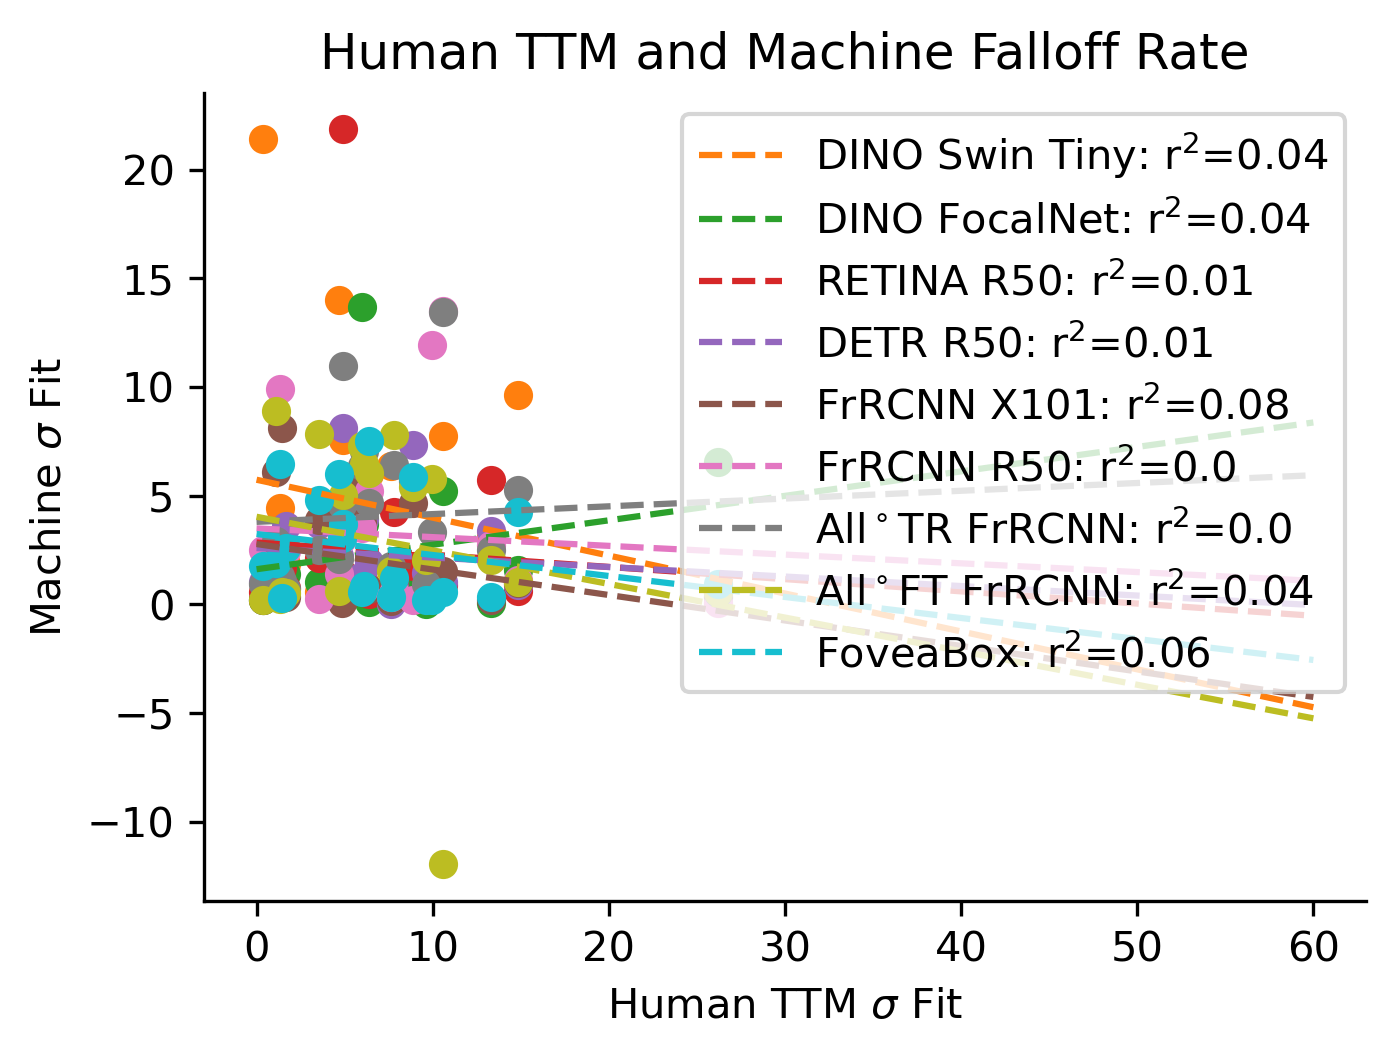

In [113]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(5,3.5))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)

#RCNN
for i, model in enumerate(models_plot,1): #accuracies_machine.keys()
    model = str(model)
    human_fit_mus = []
    machine_fit_mus = []
    for j, im in enumerate(accuracies_machine[model].keys()):
        #for ecc in accuracies_machine[model][im].keys():
        machine_mu = accuracies_machine[model][im]['sigfit']
        #machine_slope = accuracies_machine_rcnn[model][im]['slope']
        #machine_slope = accuracies_machine_detrex[model][im]['slope']
        human_mu = accuracies_human_control[int(im.split('.')[0])]['sigfit']
        
        #if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg']:
        if im not in bad_ims:
            human_fit_mus.append(human_mu)
            machine_fit_mus.append(machine_mu)
            if j==0:
                ax.scatter(human_mu, machine_mu,color=colors[i%10])#,label=f'{model_plotname[model]}')
            else:
                ax.scatter(human_mu, machine_mu,color=colors[i%10])

        #fit a line to this data
    regression = linregress(human_fit_mus, machine_fit_mus)
    slope = regression.slope
    intercept = regression.intercept
    rval = regression.rvalue
    pval = regression.pvalue
    stderr = regression.stderr
    #print(human_fit_mus)
    #print(machine_fit_mus)
    #print(model,slope,intercept)
    #plot line fit
    axes = plt.gca()
    #x_vals = np.array(axes.get_xlim())
    x_vals = np.linspace(0,60,100)
    y_vals = intercept + slope * x_vals
    #plt.plot(x_vals, y_vals, '--', c=colors[i],label=f'Model ({model_plotname[model]}) Fit: m={round(slope,3)},b={round(intercept,2)}')
    ax.plot(x_vals, y_vals, '--', c=colors[i%10],label=f'{model_plotname[model]}: r$^2$={round(rval**2,2)}')

    
# ax = plt.gca()
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend(loc=1)
plt.xlabel('Human TTM $\sigma$ Fit')
plt.ylabel('Machine $\sigma$ Fit')
plt.title("Human TTM and Machine Falloff Rate")
plt.show()

In [34]:
accuracies_machine['-2'].keys()

dict_keys(['000000009590.jpg', '000000009769.jpg', '000000011197.jpg', '000000016439.jpg', '000000018150.jpg', '000000018380.jpg', '000000019042.jpg', '000000061268.jpg', '000000063602.jpg', '000000067616.jpg', '000000119445.jpg', '000000119516.jpg', '000000186422.jpg', '000000203864.jpg', '000000209530.jpg', '000000222299.jpg', '000000226417.jpg', '000000255165.jpg', '000000281409.jpg', '000000311002.jpg', '000000322163.jpg', '000000484351.jpg', '000000491008.jpg', '000000509258.jpg', '000000529148.jpg', '000000545100.jpg'])

## Raw Accuracies before $\mu$ fit

human, ecc 1: 1.0
human, ecc 5: 0.9231111957349581
human, ecc 10: 0.8873076923076924
human, ecc 15: 0.8092307692307693
human, ecc 20: 0.7357692307692308
human ctrl naive, ecc 1: 1.0
human ctrl, ecc 5: 0.9858974358974358
human ctrl, ecc 10: 0.9730769230769231
human ctrl, ecc 15: 0.8243589743589742
human ctrl, ecc 20: 0.7730769230769231
human ctrl all, ecc 1: 1.0
human ctrl all, ecc 5: 0.9869230769230769
human ctrl all, ecc 10: 0.98
human ctrl all, ecc 15: 0.8530769230769231
human ctrl all, ecc 20: 0.7907692307692309
DINO Swin Tiny, ecc 0: 0.9038461538461539
DINO Swin Tiny, ecc 5: 0.9392307692307692
DINO Swin Tiny, ecc 10: 0.8053846153846155
DINO Swin Tiny, ecc 15: 0.6130769230769231
DINO Swin Tiny, ecc 20: 0.5659615384615384
DINO FocalNet, ecc 0: 0.9038461538461539
DINO FocalNet, ecc 5: 0.9038461538461539
DINO FocalNet, ecc 10: 0.8601923076923076
DINO FocalNet, ecc 15: 0.6240384615384614
DINO FocalNet, ecc 20: 0.5455769230769232
RETINA R50, ecc 0: 0.9615384615384616
RETINA R50, ecc 5: 0

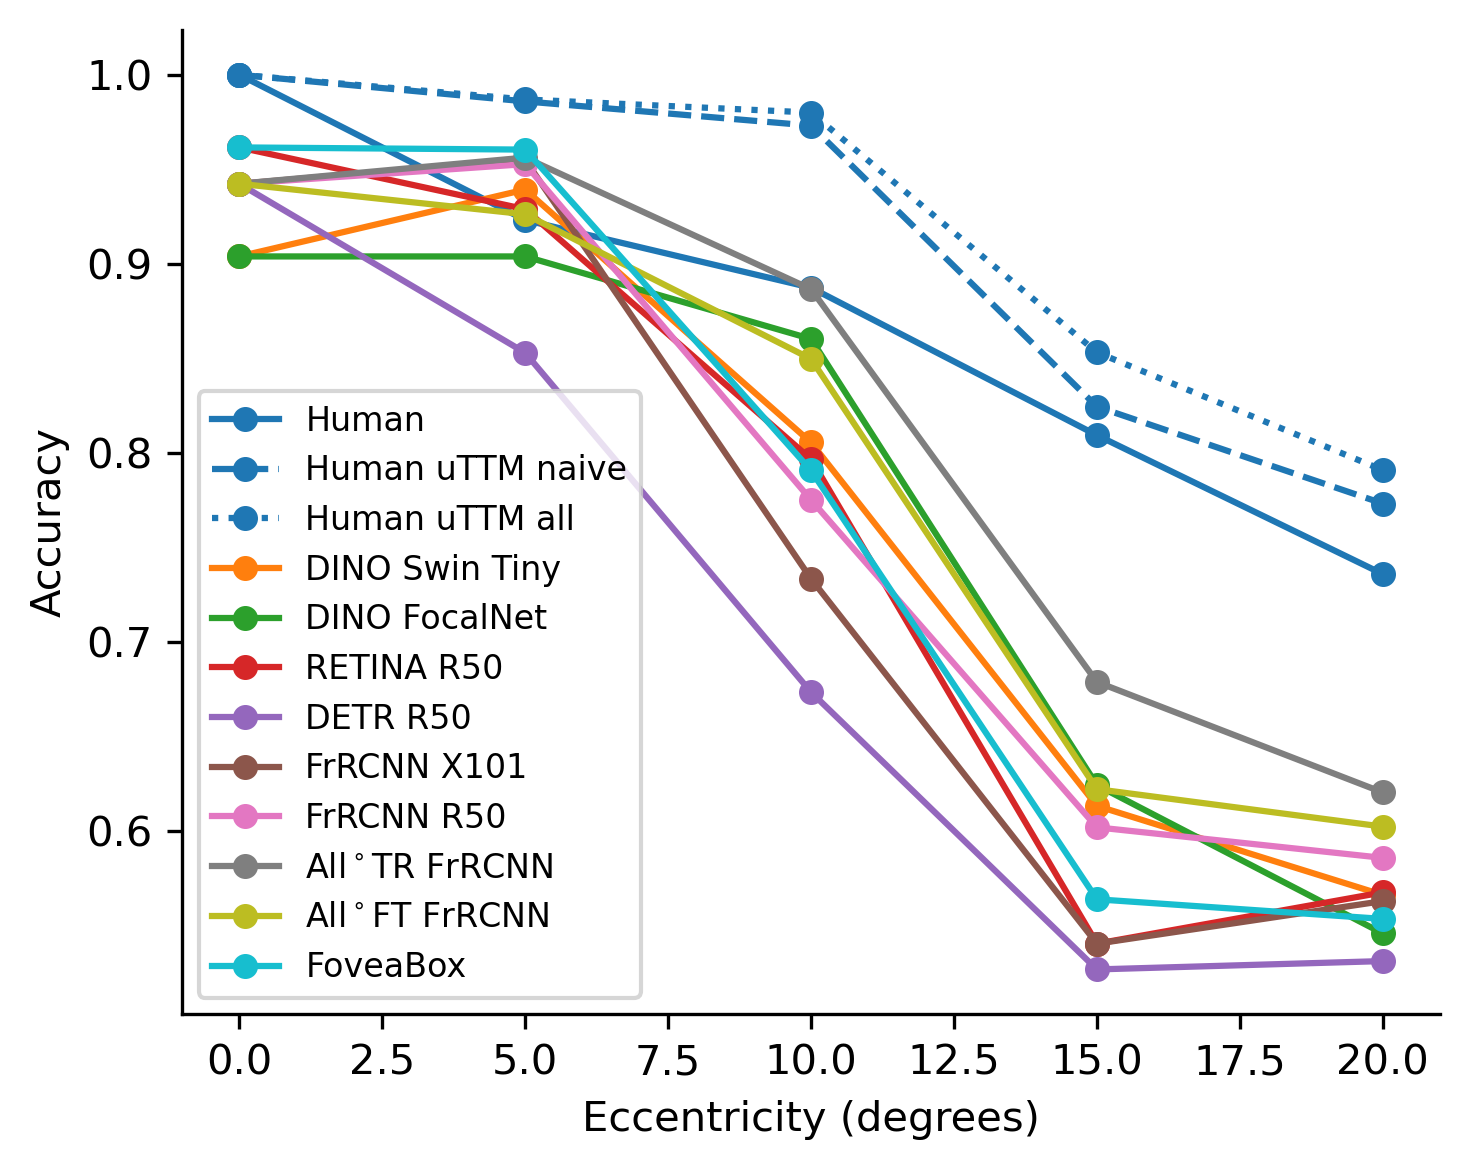

In [136]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(5,4))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)

imlistfull = list(accuracies_human.keys())

#ordered by accuracy
models_to_plot = ['-1DT','-1DF','RN','DT50','X101', '-1','-2','100','FoveaBox']
#models_to_plot = ['100','-1','-2','-1DT','-1DF','RN','DT50','X101']


#human data
human_means = [1]
print(f'human, ecc 1: 1.0')
for e in eccs[1:]:
    ecc_accs = []
    for image in imlistfull:
        acc = accuracies_human[image][e]['mean']
        ecc_accs.append(acc)
    mea = np.mean(ecc_accs)
    human_means.append(mea)
    print(f'human, ecc {e}: {mea}')
    
#human data control
human_means_control_naive = [1]
print(f'human ctrl naive, ecc 1: 1.0')
for e in eccs[1:]:
    ecc_accs = []
    for image in imlistfull:
        acc = accuracies_human_control_naive[int(image.split('.')[0])][e]['mean']
        ecc_accs.append(acc)
    mea = np.mean(ecc_accs)
    human_means_control_naive.append(mea)
    print(f'human ctrl, ecc {e}: {mea}')
    
human_means_control_all = [1]
print(f'human ctrl all, ecc 1: 1.0')
for e in eccs[1:]:
    ecc_accs = []
    for image in imlistfull:
        acc = accuracies_human_control_all[int(image.split('.')[0])][e]['mean']
        ecc_accs.append(acc)
    mea = np.mean(ecc_accs)
    human_means_control_all.append(mea)
    print(f'human ctrl all, ecc {e}: {mea}')
    
#models
model_names = []
model_means = []
for model in models_to_plot:
    model_names.append(model)
    this_model_means = []
    for e in eccs:
        ecc_accs = []
        for image in imlistfull:
            #print(accuracies_machine[model][image][eccs_to_px[e]].keys())
            acc = accuracies_machine[model][image][eccs_to_px[e]]['mean']
            ecc_accs.append(acc)
        ecc_mean = np.mean(ecc_accs)
        this_model_means.append(ecc_mean)
        print(f'{model_plotname[model]}, ecc {e}: {ecc_mean}')
    model_means.append(this_model_means)
print(model_means)

#plotting
eccs_plot = [0,5,10,15,20]
plt.plot(eccs_plot, human_means,marker='.',markersize=10,linestyle='-',color='#1f77b4',label='Human')

plt.plot(eccs_plot, human_means_control_naive,marker='.',markersize=10,color='#1f77b4',linestyle='--',label='Human uTTM naive')
plt.plot(eccs_plot, human_means_control_all,marker='.',markersize=10,linestyle=':',label='Human uTTM all')

for i, model in enumerate(model_names):
    accs = model_means[i]
    plt.plot(eccs_plot,accs,marker='.',markersize=10,linestyle='-',label=model_plotname[model])

plt.xlabel('Eccentricity (degrees)')
plt.ylabel('Accuracy')
plt.legend()
plt.legend( prop={'size': 8})
    
plt.tight_layout()
plt.savefig(f"./psychophysics_figs_ICLR/pre_mu_accuracies_rebuttal_control.png",dpi=300)
plt.show()

['-1DT', '-1DF', 'RN', 'DT50', 'X101', '-1', '-2', '100', 'FoveaBox']
bad fit 0
-1DT 11.597485369116693
bad fit 0
-1DF 11.938734692915828
bad fit 0
RN 11.42788473533195
bad fit 0
DT50 8.295901612136241
bad fit 0
X101 10.225905682212751
bad fit 0
-1 11.038628980503464
bad fit 0
-2 15.095021324730768
bad fit 0
100 13.099436838220832
bad fit 0
FoveaBox 11.359854690769422


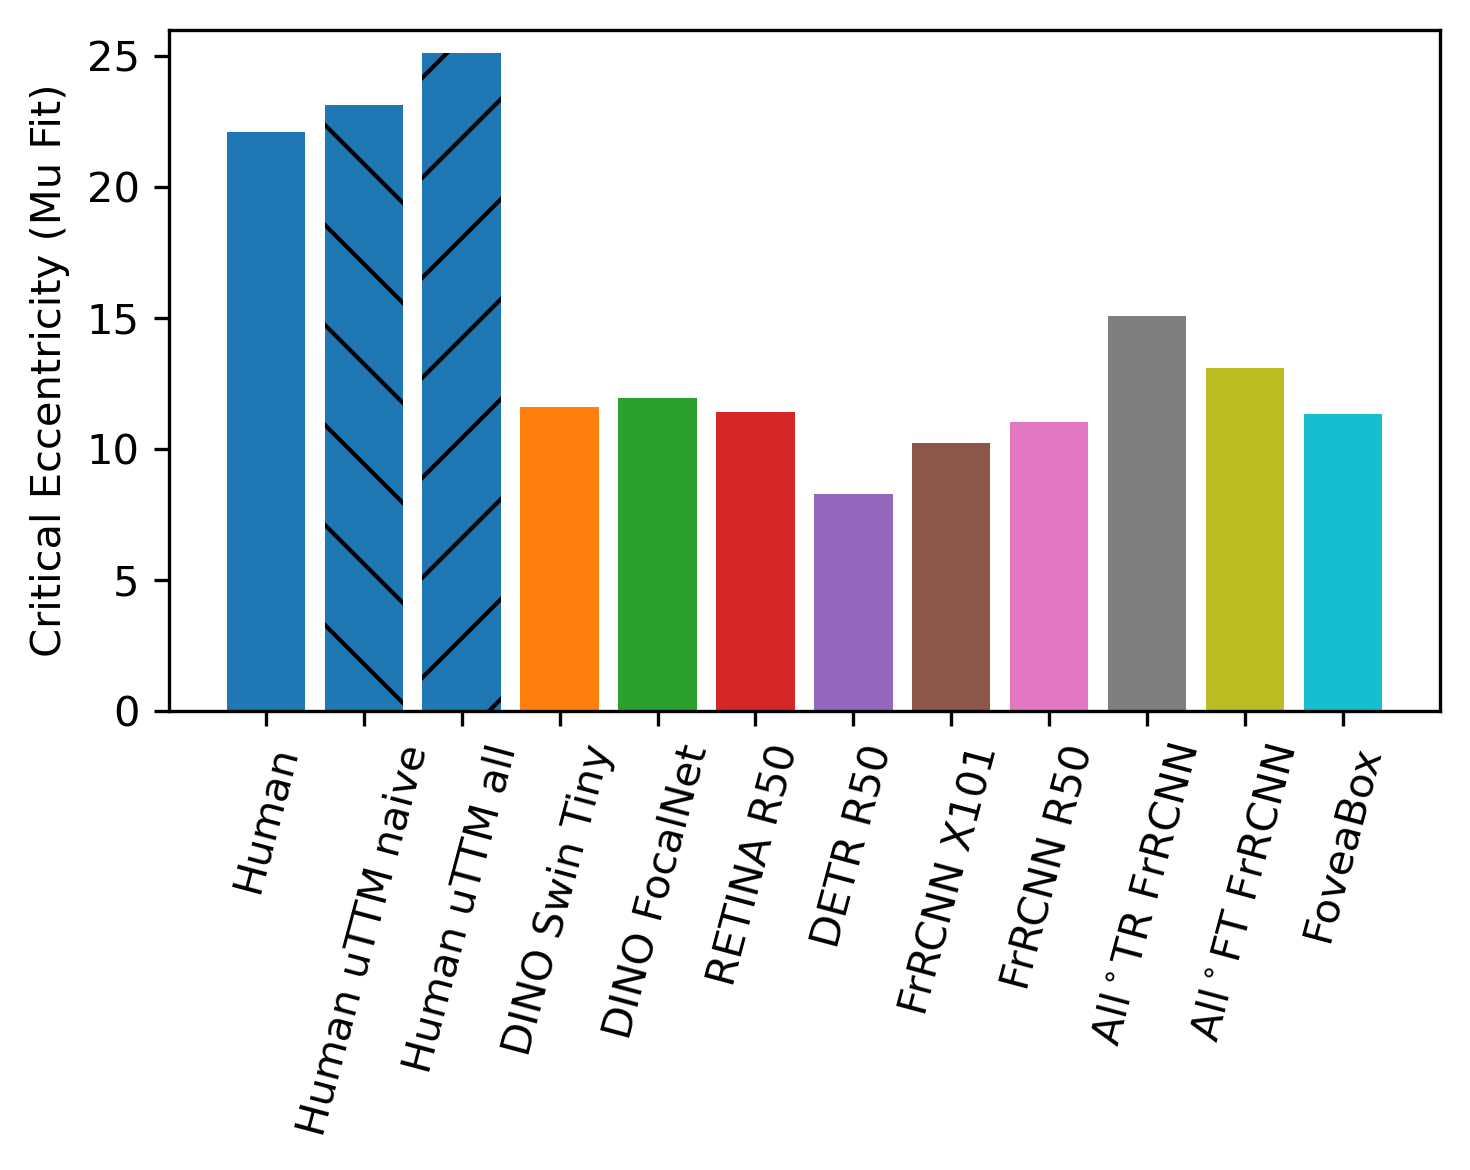

In [146]:
#Human
# 
#models_plot = ['-1DT','-1DF','-1','-2','0','5','10','15','20','100','101']
models_plot = ['-1DT','-1DF','RN','DT50','X101',-1,-2,5,10,15,20,100,101]
# models_plot = ['-1','-2','0','5','10','15','20','100','101']
models_plot = models_to_plot

print(models_plot)

mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(5,4))

#xlabels = ['Human'] + list(model_plotname.values())
xlabels = ['Human', 'Human uTTM naive', 'Human uTTM all']

raw_critical_ecc_data = {}

#HUMAN
human_fit_mus = []
    #loop through images
for j, im in enumerate(accuracies_human.keys()):
    # if im not in ['000000009769.jpg','000000067616.jpg']:
    if im not in bad_ims:
        #for ecc in accuracies_machine[model][im].keys():
        mu = accuracies_human[im]['mufit']
        #machine_slope = accuracies_machine_rcnn[model][im]['slope']
        #machine_slope = accuracies_machine_detrex[model][im]['slope']
        #human_mu = accuracies_human[im]['mufit']
        #human_fit_mus.append(human_mu)
        human_fit_mus.append(mu)

        # if j==0:
        #     plt.scatter(human_mu, machine_mu,color=colors[i])#,label=f'{model_plotname[model]}')
        # else:
        #     plt.scatter(human_mu, machine_mu,color=colors[i])

plt.bar(xlabels[0],np.mean(human_fit_mus),label='Human',color='#1f77b4')
raw_critical_ecc_data['Human'] = np.mean(human_fit_mus)
#plt.bar(0,accuracies_human[im]['mufit'])   

#CONTROL TTM HUMAN
human_fit_mus_control_naive = []
    #loop through images
for j, im in enumerate(accuracies_human_control_naive.keys()):
    # if im not in ['000000009769.jpg','000000067616.jpg']:
    if im not in bad_ims:
        #for ecc in accuracies_machine[model][im].keys():
        mu = accuracies_human_control_naive[im]['mufit']
        #machine_slope = accuracies_machine_rcnn[model][im]['slope']
        #machine_slope = accuracies_machine_detrex[model][im]['slope']
        #human_mu = accuracies_human[im]['mufit']
        #human_fit_mus.append(human_mu)
        human_fit_mus_control_naive.append(mu)

        # if j==0:
        #     plt.scatter(human_mu, machine_mu,color=colors[i])#,label=f'{model_plotname[model]}')
        # else:
        #     plt.scatter(human_mu, machine_mu,color=colors[i])

plt.bar(xlabels[1],np.mean(human_fit_mus_control_naive),label='Human uTTM naive',hatch="\\",color='#1f77b4')
raw_critical_ecc_data['Human uTTM naive'] = np.mean(human_fit_mus_control_naive)
#plt.bar(0,accuracies_human[im]['mufit'])   


human_fit_mus_control_all = []
    #loop through images
for j, im in enumerate(accuracies_human_control_all.keys()):
    # if im not in ['000000009769.jpg','000000067616.jpg']:
    if im not in bad_ims:
        #for ecc in accuracies_machine[model][im].keys():
        mu = accuracies_human_control_all[im]['mufit']
        #machine_slope = accuracies_machine_rcnn[model][im]['slope']
        #machine_slope = accuracies_machine_detrex[model][im]['slope']
        #human_mu = accuracies_human[im]['mufit']
        #human_fit_mus.append(human_mu)
        human_fit_mus_control_all.append(mu)

        # if j==0:
        #     plt.scatter(human_mu, machine_mu,color=colors[i])#,label=f'{model_plotname[model]}')
        # else:
        #     plt.scatter(human_mu, machine_mu,color=colors[i])

plt.bar(xlabels[2],np.mean(human_fit_mus_control_all),label='Human uTTM all',hatch="/")
raw_critical_ecc_data['Human uTTM all'] = np.mean(human_fit_mus_control_all)

#RCNN
#loop through models
#for i, model in enumerate(accuracies_machine.keys(),1):

for i, model in enumerate(models_plot,2):
    model = str(model)
    machine_fit_mus = []
    count = 0
    #loop through images
    for j, im in enumerate(accuracies_machine[model].keys()):
        # if im not in ['000000009769.jpg','000000067616.jpg']:
        if im not in bad_ims:
        #if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg', '000000209530.jpg', '000000322163.jpg','000000226417.jpg']:
            #for ecc in accuracies_machine[model][im].keys():
            machine_mu = accuracies_machine[model][im]['mufit']
            #machine_slope = accuracies_machine_rcnn[model][im]['slope']
            #machine_slope = accuracies_machine_detrex[model][im]['slope']
            #human_mu = accuracies_human[im]['mufit']
            #human_fit_mus.append(human_mu)
            if machine_mu >0.0 and machine_mu < 100.0:
                machine_fit_mus.append(machine_mu)
            else:
                count +=1 
                print(im)

            # if j==0:
            #     plt.scatter(human_mu, machine_mu,color=colors[i])#,label=f'{model_plotname[model]}')
            # else:
            #     plt.scatter(human_mu, machine_mu,color=colors[i])
    print("bad fit", count)
    xlabels.append(model_plotname[model])
    print(model,np.mean(machine_fit_mus))
    plt.bar(xlabels[i+1],np.mean(machine_fit_mus),label=model_plotname[model])
    raw_critical_ecc_data[model_plotname[model]] = np.mean(machine_fit_mus)

plt.xticks(rotation=75)
plt.ylim(0,26)

# plt.legend()
# plt.xlabel('Model')
plt.ylabel('Critical Eccentricity (Mu Fit)')
# plt.title("Critical Eccentricities - Uniform TTM")
plt.tight_layout()
# plt.savefig("./psychophysics_figs_ICLR/critical_ecc_bar_yes_threshold_no_sd_new_rebuttal_naive_{naive}.png",dpi=300)

plt.show()
mpl.rcParams['figure.dpi'] = 100



In [98]:
len(list(raw_critical_ecc_data.values()))
len(['None','/']+(['None']*(len(raw_critical_ecc_data.keys())-2)))

11

In [147]:
import pandas as pd
df = pd.DataFrame({'mu': list(raw_critical_ecc_data.values()),
                   'model': list(raw_critical_ecc_data.keys()),
                   'color':[colors[0],colors[0]]+colors[0:len(raw_critical_ecc_data.keys())],
                   'hatch':[None,'/','\\']+([None]*(len(raw_critical_ecc_data.keys())-3))})
df.sort_values('mu',inplace=True,ascending=False)
df

,mu,model,color,hatch
2,25.140207,Human uTTM all,#1f77b4,\
1,23.132021,Human uTTM naive,#1f77b4,/
0,22.119593,Human,#1f77b4,None
9,15.095021,All$^\circ$TR FrRCNN,#7f7f7f,None
10,13.099437,All$^\circ$FT FrRCNN,#bcbd22,None
4,11.938735,DINO FocalNet,#2ca02c,None
3,11.597485,DINO Swin Tiny,#ff7f0e,None
5,11.427885,RETINA R50,#d62728,None
11,11.359855,FoveaBox,#17becf,None
8,11.038629,FrRCNN R50,#e377c2,None


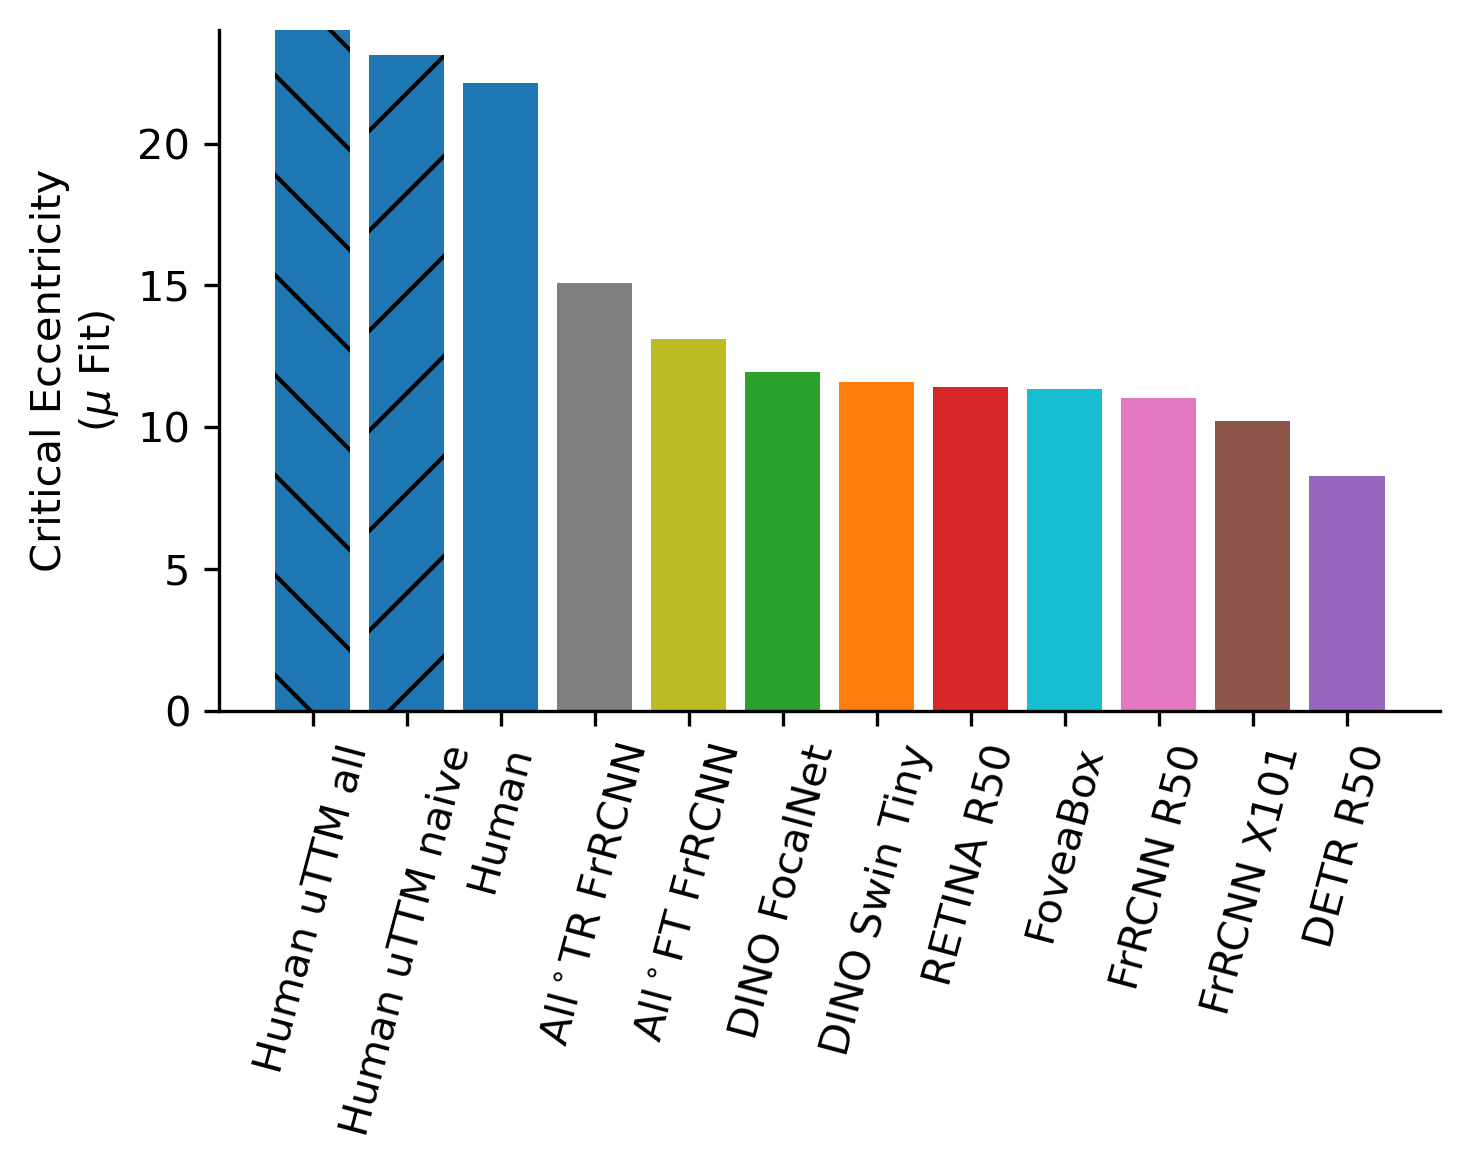

In [149]:
plt.figure(figsize=(5,4))
ax = plt.subplot(111)
plt.xticks(rotation=75)
plt.ylim(0,24)
mpl.rcParams['figure.dpi'] = 300

# plt.legend()
# plt.xlabel('Model')
plt.ylabel('Critical Eccentricity\n($\mu$ Fit)')
# plt.title("Critical Eccentricities - Uniform TTM")

for i in range(len(df.index)):
    ax.bar(df['model'][df.index[i]],df['mu'][df.index[i]],
           color=df['color'][df.index[i]],
           hatch=df['hatch'][df.index[i]])
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.savefig(f"./psychophysics_figs_ICLR/mu_bar_ordered_sum_{imtype}_new_rebuttal_control.png",dpi=300)
plt.show()

## Clutter Measure

In [66]:
from detectron2.data.datasets.coco import load_coco_json
labels = load_coco_json("/home/gridsan/groups/RosenholtzLab/detection_repos/coco/annotations/instances_val2017.json","./coco/val2017",dataset_name="coco")

#bbx_list = pd.read_csv(f'/home/gridsan/groups/RosenholtzLab/cocop_bbx_fixations_new.csv')

def calc_num_annos(image):
    #labels = bbx_list[bbx_list['image_name']==image]
    l = [l for l  in labels if l['file_name']==f'./coco/val2017/{image}'][0]
    annos = l['annotations']
    #print(l)
    return(len(annos))
    
image_list = list(accuracies_human.keys())
num_annos = [calc_num_annos(i) for i in image_list]
num_annos_dict = {image_list[i]: num_annos[i] for i in range(len(image_list))}
#num_annos_dict

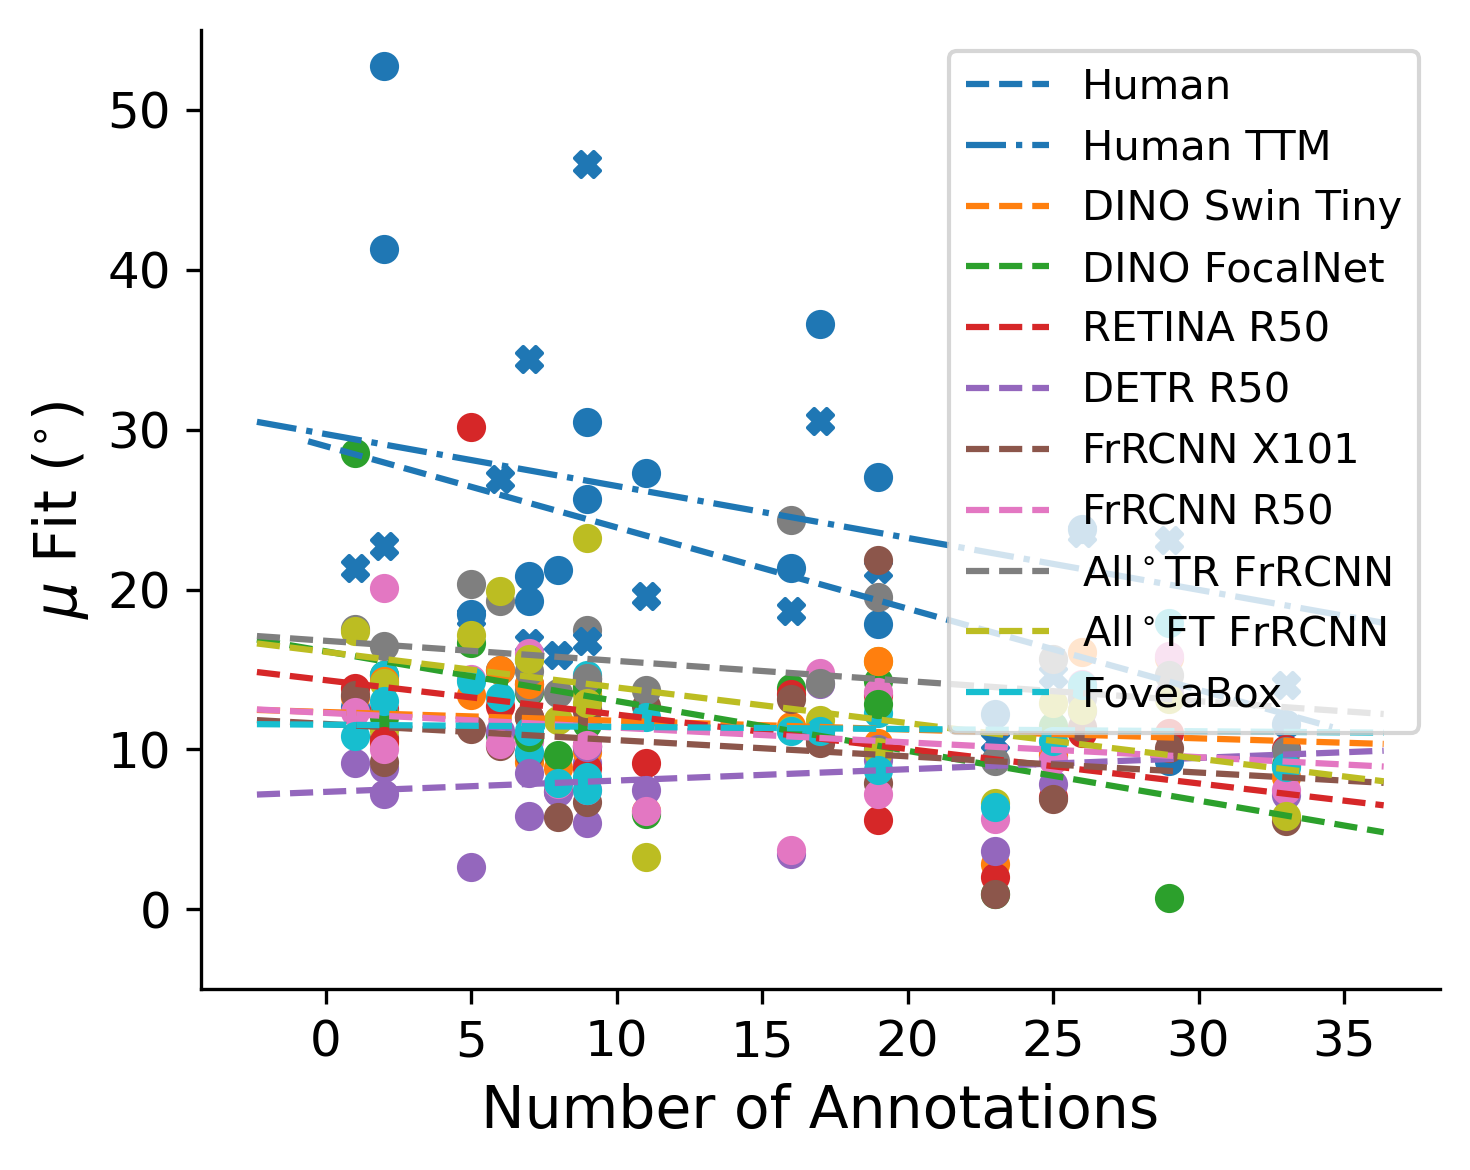

In [81]:
mpl.rcParams['figure.dpi'] = 300
from scipy.stats import linregress
#create dicts
num_annos = []
human_mus = []
human_ttm_mus = []
model_mus = {str(model): [] for model in accuracies_machine.keys()}

plt.figure(figsize=(5,4))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)

# models_plot = ['-1DT','-1DF','RN','DT50','X101',-1,-2,5,10,15,20,100,101]
#models_plot = ['-1DT','-1DF','-1','100','-2']#,'101']
# models_plot = ['-1','100','-2']#,'101']



#loop through images
for j, im in enumerate(accuracies_human.keys()):
    # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
    if im not in bad_ims:
    # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg', '000000209530.jpg', '000000322163.jpg','000000226417.jpg']:
    # if im not in ['000000009769.jpg','000000067616.jpg','000000222299.jpg','000000255165.jpg']:
    #if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg','000000222299.jpg','000000255165.jpg']:
    #if im not in ['000000009769.jpg','000000067616.jpg']:

        #human data
        human_mu = accuracies_human[im]['mufit']
        human_mus.append(human_mu)
        num_annos.append(num_annos_dict[im])
        # if(j==0):
        #     plt.scatter(num_annos_dict[im],human_mu,color=colors[0],label='Human')
        # else:
        ax.scatter(num_annos_dict[im],human_mu,color=colors[0])
        
        
        #human ttm data
        human_mu_ttm = accuracies_human_control[int(im.split('.')[0])]['mufit']
        human_ttm_mus.append(human_mu_ttm)
        #num_annos.append(num_annos_dict[im])
        # if(j==0):
        #     plt.scatter(num_annos_dict[im],human_mu,color=colors[0],label='Human')
        # else:
        ax.scatter(num_annos_dict[im],human_mu_ttm,color=colors[0],marker='X')
        
        
        #model
        #for i, model in enumerate(accuracies_machine.keys(),1):
        for i, model in enumerate(models_to_plot,1):
            model = str(model)
            # human_fit_mus = []
            # machine_fit_mus = []
            #loop through images
            #for ecc in accuracies_machine[model][im].keys():
            machine_mu = accuracies_machine[model][im]['mufit']
            model_mus[model].append(machine_mu)
                #human_fit_mus.append(human_mu)
            #machine_fit_mus.append(machine_mu)
#             if j==0:
#                 plt.scatter(num_annos_dict[im], machine_mu,color=colors[i],label=f'{model_plotname[model]}')
#             else:
            ax.scatter(num_annos_dict[im], machine_mu,color=colors[i%10])

#fit lines to this data
#human
regression = linregress(num_annos, human_mus)
slope = regression.slope
intercept = regression.intercept
# rval = regression.rvalue
# pval = regression.pvalue
# stderr = regression.stderr
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
ax.plot(x_vals, y_vals, '--', c=colors[0],label=f'Human')#: m={round(slope,3)}')

#humanTTM
regression = linregress(num_annos, human_ttm_mus)
slope = regression.slope
intercept = regression.intercept
# rval = regression.rvalue
# pval = regression.pvalue
# stderr = regression.stderr
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
ax.plot(x_vals, y_vals, '-.', c=colors[0],label=f'Human TTM')#: m={round(slope,3)}')

#machine
for i, model in enumerate(models_to_plot,1):
#for i, model in enumerate(accuracies_machine.keys(),1):
    regression = linregress(num_annos, model_mus[str(model)])
    slope = regression.slope
    intercept = regression.intercept
    # rval = regression.rvalue
    # pval = regression.pvalue
    # stderr = regression.stderr
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--', c=colors[i%10],label=f'{model_plotname[str(model)]}')# Fit: m={round(slope,3)}')

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.legend(fontsize=10)
plt.xlabel('Number of Annotations',fontsize=14)
plt.ylabel('$\mu$ Fit ($^{\circ}$)',fontsize=14)
# plt.title("Number of Objects and Critical Eccentricity")
plt.ylim([-5,55])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#vd 11/17/23 remove save
# plt.savefig(f"./psychophysics_figs_ICLR/num_objects_scatter_yes_threshold_no_sd_{imtype}_rebuttal.png",dpi=300)

plt.show()


## Bounding Box Size

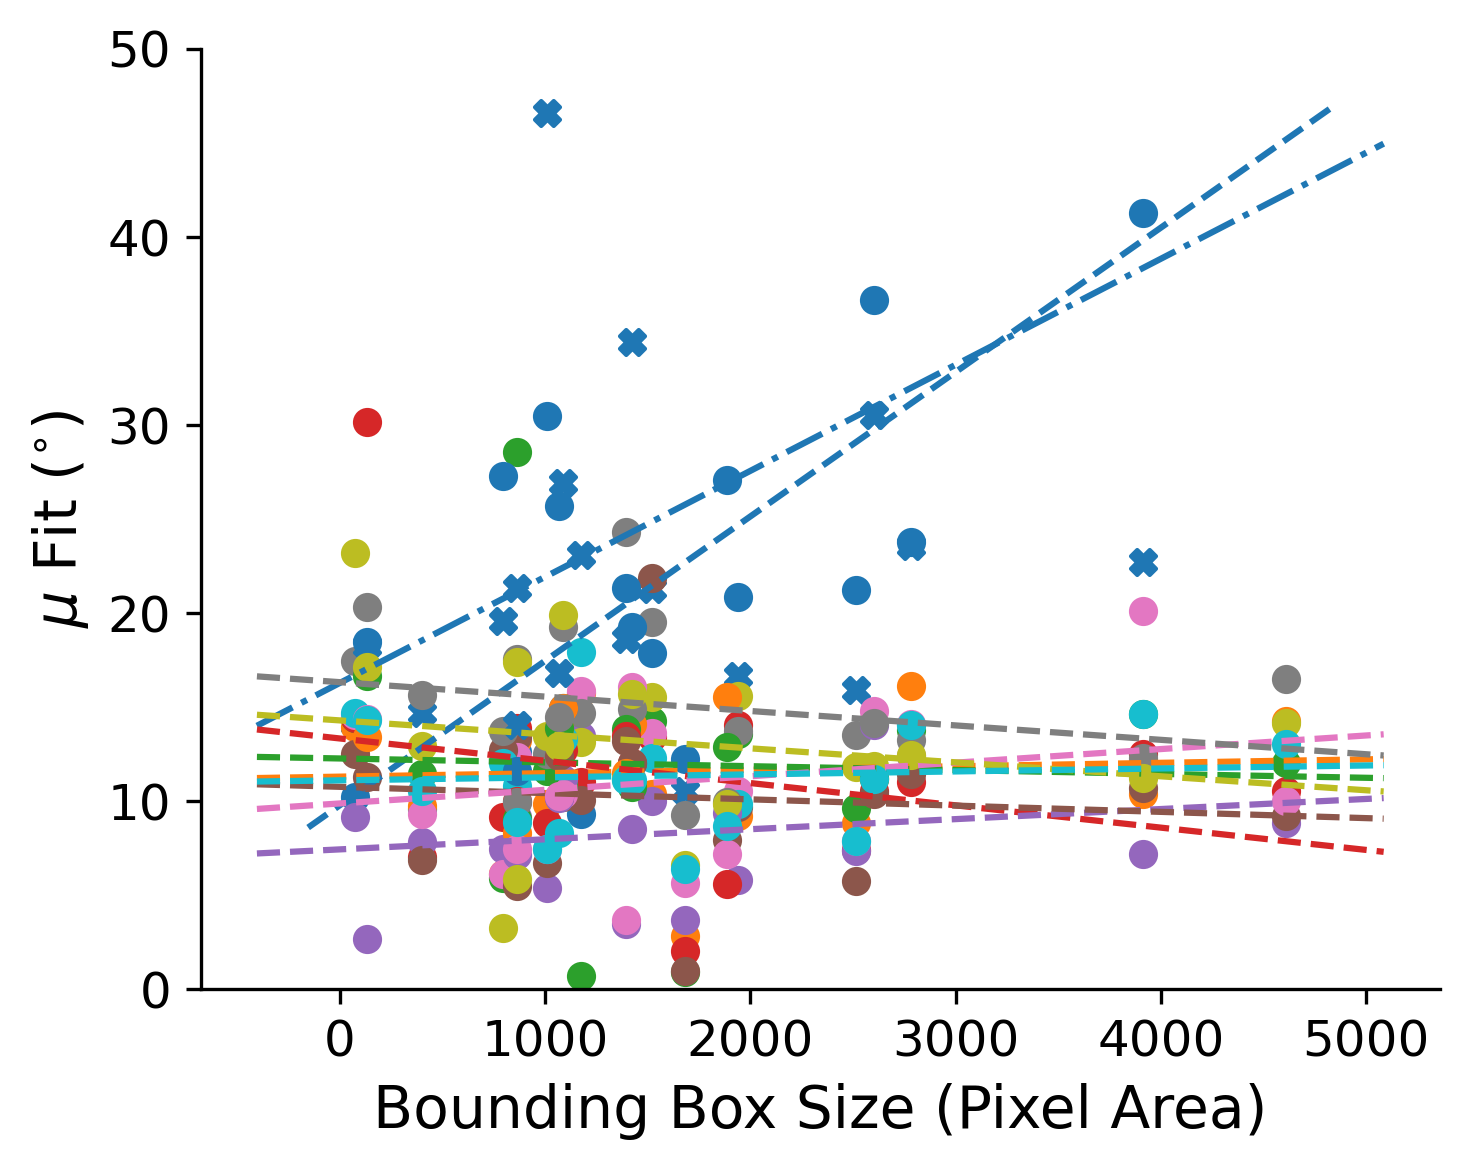

In [84]:
from scipy.stats import linregress
import scipy
import pandas as pd
import matplotlib.patches as patches
bbx_list = pd.read_csv(f'/home/gridsan/groups/RosenholtzLab/cocop_bbx_fixations_new.csv')

#create dicts
bbx_as = []
human_mus = []
human_ttm_mus = []
model_mus = {str(model): [] for model in accuracies_machine.keys()}
plt.figure(figsize=(5,4))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)

#loop through images
for j, im in enumerate(accuracies_human.keys()):
    # if im not in ['000000009769.jpg','000000067616.jpg','000000222299.jpg','000000255165.jpg']:
    # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg','000000226417.jpg']:
    # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg', '000000209530.jpg', '000000322163.jpg','000000226417.jpg']:
    if im not in bad_ims:
    #if im not in ['000000009769.jpg','000000067616.jpg']:
        bbx_w = bbx_list[bbx_list['image_name']==im]['bbx_w_16'].item()
        bbx_h = bbx_list[bbx_list['image_name']==im]['bbx_h_16'].item()
        bbx_a = bbx_w * bbx_h
        bbx_as.append(bbx_a)

        #human data
        human_mu = accuracies_human[im]['mufit']
        human_mus.append(human_mu)
        ax.scatter(bbx_a,human_mu,color=colors[0])

        #human TTM data
        human_ttm_mu = accuracies_human_control[int(im.split('.')[0])]['mufit']
        human_ttm_mus.append(human_ttm_mu)
        ax.scatter(bbx_a,human_ttm_mu,color=colors[0],marker='X')
        
        #model data
        for i, model in enumerate(models_to_plot,1):
        #for i, model in enumerate(accuracies_machine.keys(),1):
            model = str(model)
            machine_mu = accuracies_machine[model][im]['mufit']
            model_mus[model].append(machine_mu)

            ax.scatter(bbx_a, machine_mu,color=colors[i%10])


#fit lines to this data
#human
regression = linregress(bbx_as, human_mus)
slope = regression.slope
intercept = regression.intercept
# rval = regression.rvalue
# pval = regression.pvalue
# stderr = regression.stderr
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
ax.plot(x_vals, y_vals, '--', c=colors[0],label=f'Human')# Fit: m={round(slope,3)}')

#human TTM
regression = linregress(bbx_as, human_ttm_mus)
slope = regression.slope
intercept = regression.intercept
# rval = regression.rvalue
# pval = regression.pvalue
# stderr = regression.stderr
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
ax.plot(x_vals, y_vals, '-.', c=colors[0],label=f'Human TTM')# Fit: m={round(slope,3)}')

#machine
for i, model in enumerate(models_to_plot,1):
#for i, model in enumerate(accuracies_machine.keys(),1):
    regression = linregress(bbx_as, model_mus[str(model)])
    slope = regression.slope
    intercept = regression.intercept
    # rval = regression.rvalue
    # pval = regression.pvalue
    # stderr = regression.stderr
    #x_vals = np.linspace(0,60,100)
    y_vals = intercept + slope * x_vals
#    plt.plot(x_vals, y_vals, '--', c=colors[i],label=f'{model_plotname[model]} Fit: m={round(slope,3)},b={round(intercept,2)}')
    ax.plot(x_vals, y_vals, '--', c=colors[i%10],label=f'{model_plotname[str(model)]}')# Fit: m={round(slope,3)}')

#ax.set_xscale('log')
#ax.set_yscale('log')
                
                
#plt.legend()
plt.xlabel('Bounding Box Size (Pixel Area)', fontsize=14)
plt.ylabel('$\mu$ Fit ($^{\circ}$)',fontsize=14)
# plt.title("Object Size and Critical Eccentricity")
plt.ylim([0,50])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#vd 11/17/23 remove save
#plt.savefig(f"./psychophysics_figs_ICLR/size_objects_scatter_yes_threshold_no_sd_{imtype}.png",dpi=300)
plt.show()
mpl.rcParams['figure.dpi'] = 300


# plt.savefig("./psychophysics_figs_ICLR/size_objects_scatter_yes_threshold_no_sd_rebuttal.png",dpi=300)


## plot recognition task version 

In [101]:
#accuracies_human['000000009590.jpg']

['-1', '100', '-2', 'BL_RCNN_no_thresh', 'FT_RCNN_no_thresh', 'TR_RCNN_no_thresh']
bad fit 0
-1 11.038628980503464 FrRCNN R50 FrRCNN R50
bad fit 0
100 13.099436838220832 All$^\circ$FT FrRCNN All$^\circ$FT FrRCNN
bad fit 0
-2 15.095021324730768 All$^\circ$TR FrRCNN All$^\circ$TR FrRCNN
bad fit 0
BL_RCNN_no_thresh 11.429668785321976 FrRCNN R50  FrRCNN R50 
bad fit 0
FT_RCNN_no_thresh 12.430811393316473 All$^\circ$FT FrRCNN  All$^\circ$FT FrRCNN 
bad fit 0
TR_RCNN_no_thresh 10.153126611187837 All$^\circ$TR FrRCNN  All$^\circ$TR FrRCNN 


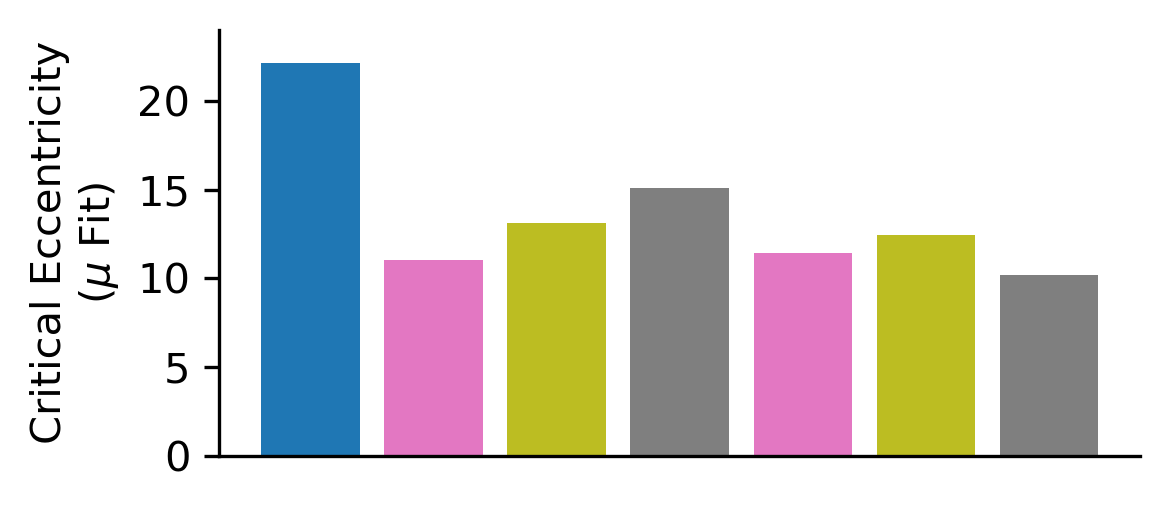

In [102]:
#Human
models_plot = models_to_plot
models_plot = ['-1','100','-2','BL_RCNN_no_thresh','FT_RCNN_no_thresh','TR_RCNN_no_thresh']
colors = ['#e377c2','#bcbd22','#7f7f7f','#e377c2','#bcbd22','#7f7f7f']

print(models_plot)

# mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,1.8))
ax = plt.subplot(111)
ax.spines[['right', 'top']].set_visible(False)
xlabels = ['Human']

raw_critical_ecc_data = {}

human_fit_mus = []
    #loop through images
for j, im in enumerate(accuracies_human.keys()):
    if im not in bad_ims:
        #for ecc in accuracies_machine[model][im].keys():
        mu = accuracies_human[im]['mufit']
        human_fit_mus.append(mu)

plt.bar(xlabels[0],np.mean(human_fit_mus),label='Human')
raw_critical_ecc_data['Human'] = np.mean(human_fit_mus)



#RCNN
#loop through models

for i, model in enumerate(models_plot,1):
    model = str(model)
    machine_fit_mus = []
    count = 0
    #loop through images
    for j, im in enumerate(accuracies_machine[model].keys()):
        # if im not in ['000000009769.jpg','000000067616.jpg']:
        if im not in bad_ims:
        # if im not in ['000000009769.jpg','000000067616.jpg','000000019042.jpg','000000209530.jpg','000000491008.jpg', '000000061268.jpg','000000281409.jpg', '000000509258.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg', '000000209530.jpg', '000000322163.jpg','000000226417.jpg']:
            #for ecc in accuracies_machine[model][im].keys():
            machine_mu = accuracies_machine[model][im]['mufit']
            if machine_mu >0.0 and machine_mu < 100.0:
                machine_fit_mus.append(machine_mu)
            else:
                count +=1 
                print(im)
    print("bad fit", count)
    xlabels.append(model_plotname[model])
    print(model,np.mean(machine_fit_mus),model_plotname[model],xlabels[i])
    label = model_plotname[model]
    if i >3:
        label = None
    plt.bar(xlabels[i],np.mean(machine_fit_mus),label=label,color=colors[i-1])
    raw_critical_ecc_data[model_plotname[model]] = np.mean(machine_fit_mus)

plt.xticks(rotation=75)
ax.get_xaxis().set_visible(False)
plt.ylim(0,24)

# plt.legend()
# plt.xlabel('Model')
plt.ylabel('Critical Eccentricity\n($\mu$ Fit)')

# plt.title("Critical Eccentricities - Uniform TTM")
plt.tight_layout()
#vd 11/17/23 remove save
#plt.savefig(f"./psychophysics_figs_ICLR/mu_bars_rcnn_{imtype}.png",dpi=300)

plt.show()
# mpl.rcParams['figure.dpi'] = 100



## plot RCNN threshold experiments

['-1', 'BL_RCNN_sum', 'TR_RCNN_sum', 'BL_RCNN_thresh_1', 'BL_RCNN_area_10', 'BL_RCNN_area_50', 'BL_RCNN_no_thresh', 'BL_RCNN_permute', 'BL_RCNN_permute_1', 'TR_RCNN_permute_1']
bad fit 0
-1 11.058913295043103


KeyError: 'BL_RCNN_sum'

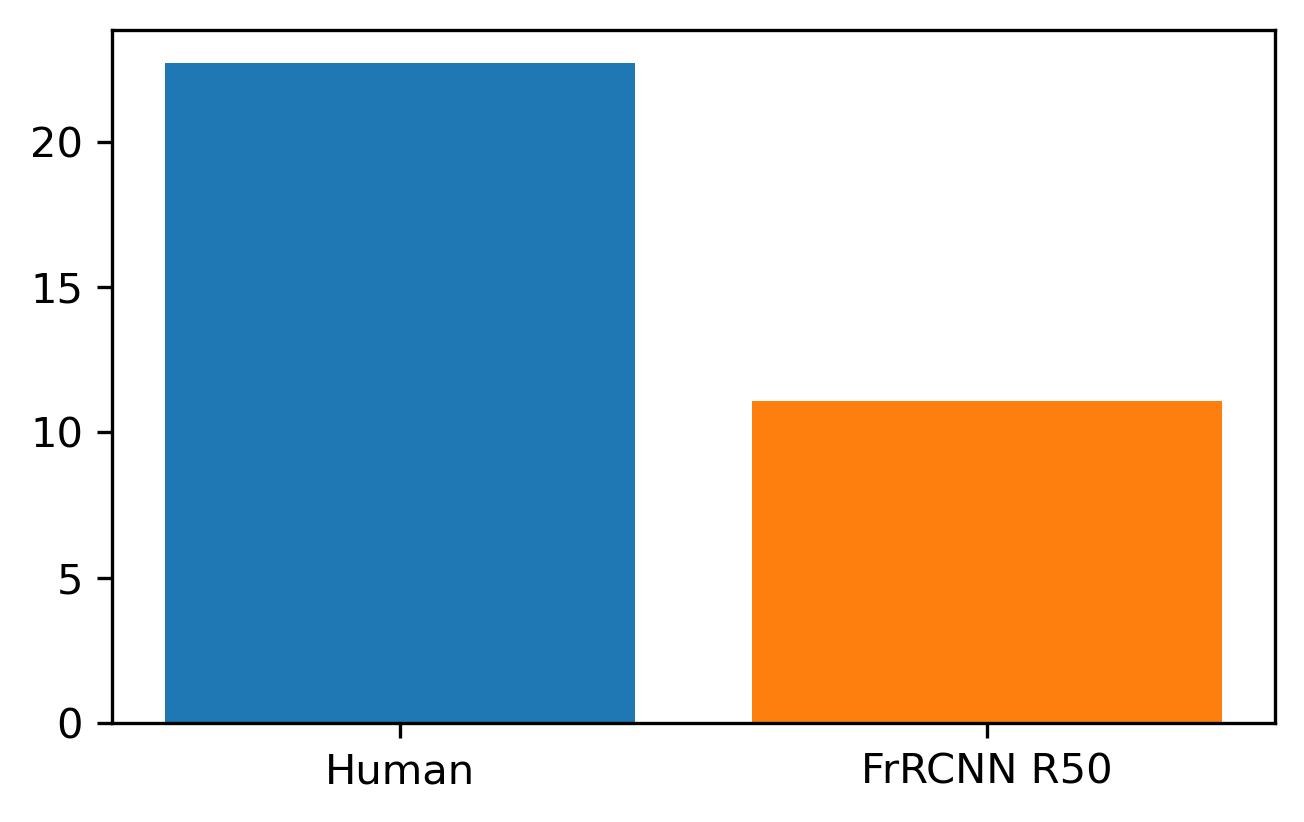

In [103]:
#Human
models_plot = models_to_plot
models_plot = ['-1',
               'BL_RCNN_sum',
               'TR_RCNN_sum',
              'BL_RCNN_thresh_1',
              'BL_RCNN_area_10',
              'BL_RCNN_area_50',
              'BL_RCNN_no_thresh',
              'BL_RCNN_permute',
              'BL_RCNN_permute_1',
             'TR_RCNN_permute_1' ]

print(models_plot)

# mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(5,3))
xlabels = ['Human']

raw_critical_ecc_data = {}

human_fit_mus = []
    #loop through images
for j, im in enumerate(accuracies_human.keys()):
    if im not in ['000000009769.jpg','000000067616.jpg']:
        #for ecc in accuracies_machine[model][im].keys():
        mu = accuracies_human[im]['mufit']
        human_fit_mus.append(mu)

plt.bar(xlabels[0],np.mean(human_fit_mus),label='Human')
raw_critical_ecc_data['Human'] = np.mean(human_fit_mus)



#RCNN
#loop through models

for i, model in enumerate(models_plot,1):
    model = str(model)
    machine_fit_mus = []
    count = 0
    #loop through images
    for j, im in enumerate(accuracies_machine[model].keys()):
        if im not in ['000000009769.jpg','000000067616.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg','000000019042.jpg','000000209530.jpg','000000491008.jpg', '000000061268.jpg','000000281409.jpg', '000000509258.jpg']:
        # if im not in ['000000009769.jpg','000000067616.jpg','000000018380.jpg', '000000209530.jpg', '000000322163.jpg','000000226417.jpg']:
            #for ecc in accuracies_machine[model][im].keys():
            machine_mu = accuracies_machine[model][im]['mufit']
            if machine_mu >0.0 and machine_mu < 100.0:
                machine_fit_mus.append(machine_mu)
            else:
                count +=1 
                print(im)
    print("bad fit", count)
    xlabels.append(model_plotname[model])
    print(model,np.mean(machine_fit_mus))
    plt.bar(xlabels[i],np.mean(machine_fit_mus),label=model_plotname[model])
    raw_critical_ecc_data[model_plotname[model]] = np.mean(machine_fit_mus)

plt.xticks(rotation=75)
plt.ylim(0,24)

# plt.legend()
# plt.xlabel('Model')
plt.ylabel('Critical Eccentricity (Mu Fit)')
# plt.title("Critical Eccentricities - Uniform TTM")
plt.tight_layout()
# plt.savefig("./psychophysics_figs_ICLR/critical_ecc_bar_yes_threshold_no_sd.png",dpi=300)

plt.show()
# mpl.rcParams['figure.dpi'] = 100



## Plot Human and Machine Raw Data for All Images Separately: Baseline, FT All, ScratcTrain All

In [104]:
[accuracies_human[image][e]['subsacc'] for e in eccs[1:]]

[[1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.9, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.8, 1.0, 1.0, 1.0],
 [0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 0.6, 1.0, 1.0, 0.9],
 [0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 1.0, 1.0, 0.8]]

In [105]:
#test that mean of subjects is same as mean overall
image = '000000186422.jpg'
mean_accs_h = [accuracies_human[image][e]['mean'] for e in eccs]
bysub_accs_h = [1]+[np.mean(accuracies_human[image][e]['subsacc']) for e in eccs[1:]]
print(mean_accs_h)
print(bysub_accs_h)
#print(np.mean(accs_h))
#print(


[1.0, 0.97, 0.98, 0.94, 0.94]
[1, 0.9700000000000001, 0.9800000000000001, 0.9400000000000001, 0.9400000000000001]


In [106]:
accuracies_human[image]

{0: {'mean': 1.0, 'sd': 0, 'raw': [1.0]},
 5: {'mean': 0.97,
  'sd': 0.1705872210923198,
  'raw': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]),
  'subs': ['EL',
   'VL',
   'AL_experiment',
   'AP',
   'VL',
   'MH',
   'PS',
   'HC',
   'SM',
   'AM_full'],
  'subsacc': [1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 0.9],
  'subsaccstd': [0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.3]},
 10: {'mean': 0.98,
  'sd': 0.13999999999999999,
  'raw': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [ ]:
from scipy.stats import linregress
from scipy.stats import sem
import scipy
import matplotlib.patches as patches
import matplotlib as mpl
import pandas as pd
bbx_list = pd.read_csv(f'/home/gridsan/groups/RosenholtzLab/cocop_bbx_fixations_new.csv')


colors_small = ['#1f77b4','#2ca02c', '#e377c2', '#7f7f7f']

def cumulative_norm(x,mu,sigma):
    y = (1+scipy.special.erf(((-1*x)+mu)/(sigma*np.sqrt(2.))))/2
    y = y/2 + 0.5
    return(y)
    
def bbx_xywhtoxyxy(bbx):
    x,y,w,h = bbx
    x2 = x + w
    y2 = y + h
    return([x,y,x2,y2])
mpl.rcParams['figure.dpi'] = 300


#color axes
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# models_plot = ['-1DT','-1DF','-1','100','-2']
models_plot = ['-1DF','-1','-2',]
    
    

#fit slope (and plot vals from dict)
#for image in ['000000186422.jpg']:
for image in ['000000009590.jpg','000000009769.jpg','000000011197.jpg','000000016439.jpg','000000018150.jpg','000000018380.jpg','000000019042.jpg','000000061268.jpg','000000063602.jpg','000000067616.jpg','000000119445.jpg','000000119516.jpg','000000186422.jpg','000000203864.jpg','000000209530.jpg','000000222299.jpg','000000226417.jpg','000000255165.jpg','000000281409.jpg','000000311002.jpg','000000322163.jpg','000000484351.jpg','000000491008.jpg','000000509258.jpg','000000529148.jpg','000000545100.jpg']:
    # ,'000000222299.jpg','000000545100.jpg']:
#for image in accuracies_machine[model].keys():
    print(image)
    imname = image.replace('.jpg','')
    

    #plot human
    accs_h = [accuracies_human[image][e]['mean'] for e in eccs]
    
    #sd sd_h_bysub = [0]+[np.std(accuracies_human[image][e]['subsacc']) for e in eccs[1:]] #no accuracy for eccentricity=0, thats implied.
    sd_h_bysub = [0]+[sem(accuracies_human[image][e]['subsacc']) for e in eccs[1:]] #no accuracy for eccentricity=0, thats implied.
    
    plt.figure(figsize=(4.5,3))
    ax = plt.subplot(111)
    ax.spines[['right', 'top']].set_visible(False)
    plt.plot(eccs, accs_h, '.', c=colors[0])#,label=f'Human')
    plt.errorbar(eccs, accs_h, yerr=sd_h_bysub, linestyle='none', c=colors[0])

    # plt.title(imname)
    
    #human model fit
    x_vals = np.linspace(0,20,100)
    #x_vals = np.array(x)
    mufit = accuracies_human[image]['mufit']
    y_vals = cumulative_norm(x_vals, mufit,
                             accuracies_human[image]['sigfit'])
    plt.plot(x_vals, y_vals, '--', c=colors_small[0],label=f'Human')#: mu={round(mufit,2)}')

    
    #loop through machine models
    for i, model in enumerate(models_plot,1):
        model = str(model)
        print(i)

        #plot
        accs_m = [accuracies_machine[model][image][eccs_to_px[e]]['mean'] for e in eccs]
        plt.plot(eccs, accs_m, '.', c=colors_small[i])#,label=f'RCNN {model_plotname[model]}')

        #model fit
        x_vals = np.linspace(0,20,100)
        #x_vals = np.array(x)
        mufit = accuracies_machine[model][image]['mufit']
        y_vals = cumulative_norm(x_vals, mufit,
                                 accuracies_machine[model][image]['sigfit'])
        plt.plot(x_vals, y_vals, '--', c=colors_small[i],label=f'{model_plotname[model]}') #: mu={round(mufit,2)}')

    #plt.legend()
    plt.legend(prop={'size': 8})
    plt.xlabel('Eccentricity ($^{\circ}$)',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    # plt.title(f'Psychometric Curves: Single Image')
    #plt.title(f'Human & Models: COCO Image {imname}')
    plt.tight_layout()
    # plt.savefig(f'./psychophysics_figs_ICLR/accuracy_fit_human_machine_{imname}_{imtype}_ebars.png',dpi=300)
    plt.show()
    
    mong_ecc = 240
    
    #bounging boxes
    ground_truth_bbx = [bbx_list[bbx_list['image_name']==image]['bbx_x_16'].item(),
                   bbx_list[bbx_list['image_name']==image]['bbx_y_16'].item(),
                   bbx_list[bbx_list['image_name']==image]['bbx_w_16'].item(),
                   bbx_list[bbx_list['image_name']==image]['bbx_h_16'].item()]
    gt_rect = patches.Rectangle((ground_truth_bbx[0],
                             ground_truth_bbx[1]),
                             ground_truth_bbx[2],
                             ground_truth_bbx[3],
                             linewidth=2, edgecolor='r',facecolor='none')
    padded_rect = patches.Rectangle((ground_truth_bbx[0]-mong_ecc//4,
                             ground_truth_bbx[1]-mong_ecc//4),
                             ground_truth_bbx[2]+mong_ecc//2,
                             ground_truth_bbx[3]+mong_ecc//2,
                             linewidth=2, edgecolor='r',facecolor='none')
    

    #plot the image
    imfolder_present = '/home/gridsan/groups/RosenholtzLab/final_experiment_multiple_mongrel_images_present/'
    # pmong = cv2.imread(f'/home/gridsan/groups/RosenholtzLab/final_experiment_TTMfoveated/present/240/{imname}_0.png')
    # imfolder_absent = '/home/gridsan/groups/RosenholtzLab/final_experiment_multiple_mongrel_images_absent/'
    pmong = cv2.imread(os.path.join(imfolder_present,f'ecc{mong_ecc}/mongrel_{imname}_ecc_{mong_ecc}_0.jpg'))
    pmong = cv2.cvtColor(pmong, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    ax.imshow(pmong)
    ax = plt.gca()
    ax.add_patch(padded_rect)
    plt.axis('off')
    # plt.savefig(f'./psychophysics_figs_ICLR/accuracy_fit_human_machine_{imname}_pad_bbox_{imtype}.png',dpi=300)
    plt.show()
    
    cocoim = cv2.imread(os.path.join(imfolder_present,f'ecc0/{imname}.jpg'))
    cocoim = cv2.cvtColor(cocoim, cv2.COLOR_BGR2RGB)
    fix,ax = plt.subplots()
    plt.imshow(cocoim)
    ax.add_patch(gt_rect)
    plt.axis('off')
    # plt.savefig(f'./psychophysics_figs_ICLR/accuracy_fit_human_machine_{imname}_gt_bbox_{imtype}.png',dpi=300)
    plt.tight_layout()
    plt.show()